In [1]:
# Author - Dvir Sadon
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
df['quality'].replace([3, 4, 5], 1, inplace=True)
df['quality'].replace(6, 2, inplace=True)
df['quality'].replace([7, 8], 3, inplace=True)
print(df['quality'])

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: quality, Length: 1599, dtype: int64


In [4]:
df['quality'].value_counts()

1    744
2    638
3    217
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Number of accurances for each quality value'}>

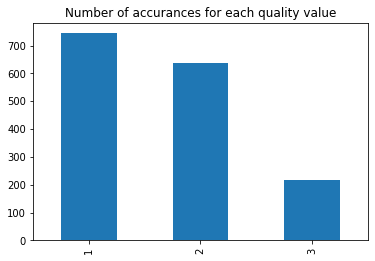

In [5]:
df['quality'].value_counts().sort_index().plot(kind='bar', title="Number of accurances for each quality value")

In [6]:
X = df.drop('quality', axis=1)
y = df['quality']

alcohol                 0.161817
sulphates               0.111240
volatile acidity        0.106977
density                 0.088762
citric acid             0.066412
total sulfur dioxide    0.059874
chlorides               0.046871
fixed acidity           0.045269
pH                      0.031392
residual sugar          0.014712
free sulfur dioxide     0.011837
Name: MI Scores, dtype: float64


<AxesSubplot:title={'center':'Mi score for each feature'}>

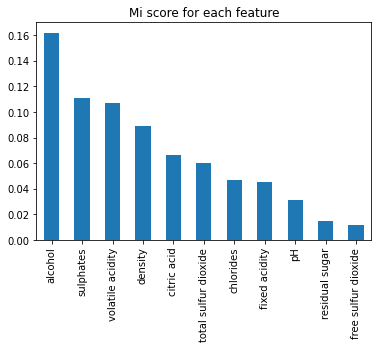

In [7]:
# Mutual information
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)
mi_scores.plot(kind='bar', title="Mi score for each feature")

Text(0.5, 1.0, 'Corraltion heatmap')

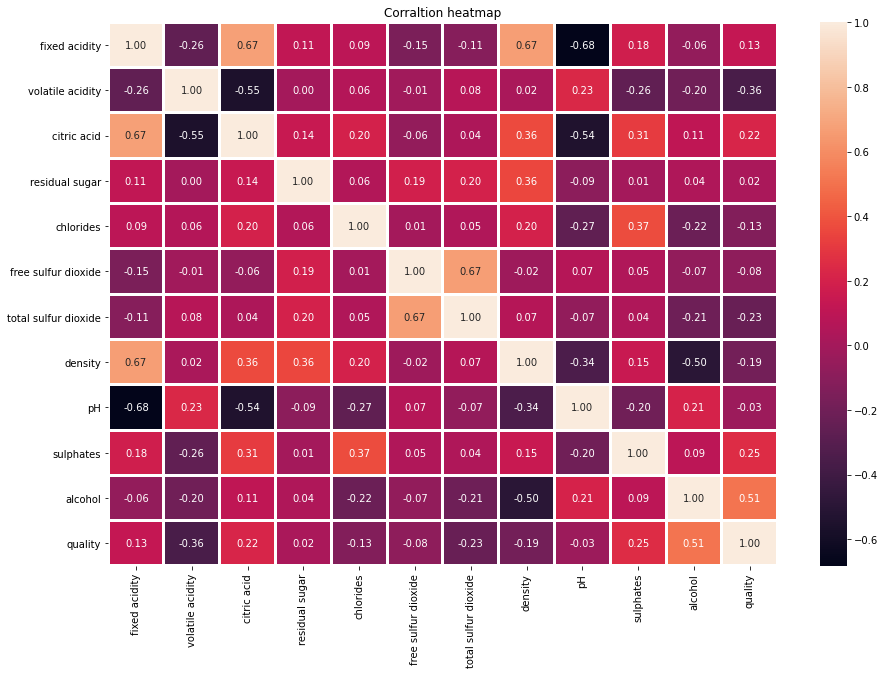

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2).set_title("Corraltion heatmap")

In [9]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.507839
sulphates               0.252378
citric acid             0.217913
fixed acidity           0.126195
residual sugar          0.021784
pH                     -0.030279
free sulfur dioxide    -0.078917
chlorides              -0.125326
density                -0.186537
total sulfur dioxide   -0.232983
volatile acidity       -0.360621
Name: quality, dtype: float64

In [10]:
X = X.drop('residual sugar', axis=1)

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN

In [12]:
arr = np.zeros(13, dtype = float)
for j in range(10): 
    for i in range(2, 15):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)

        # Predicting
        y_pred = knn.predict(X_test)
        predict_score = metrics.accuracy_score(y_test, y_pred)
        arr[i-2] = (arr[i-2] + predict_score)/2
        # print("Accuracy:", str(i), metrics.accuracy_score(y_test, y_pred))

print(arr)

[0.78446807 0.73529913 0.74200398 0.72635932 0.72859427 0.71965447
 0.71741952 0.70847971 0.71294961 0.71071466 0.71294961 0.6995399
 0.71518456]


<BarContainer object of 13 artists>

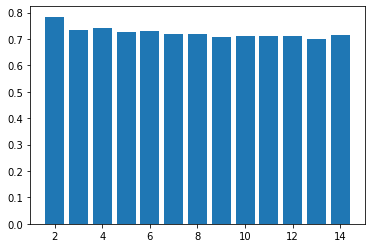

In [13]:
plt.bar(range(2, 15), arr)

## Decision Tree 

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7449664429530202
              precision    recall  f1-score   support

           1       0.74      0.74      0.74       146
           2       0.65      0.62      0.64       149
           3       0.82      0.87      0.85       152

    accuracy                           0.74       447
   macro avg       0.74      0.74      0.74       447
weighted avg       0.74      0.74      0.74       447



## Random Forest

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.814317673378076
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       146
           2       0.78      0.68      0.73       149
           3       0.85      0.96      0.90       152

    accuracy                           0.81       447
   macro avg       0.81      0.81      0.81       447
weighted avg       0.81      0.81      0.81       447



## AdaBoost

89
0.668903803131991


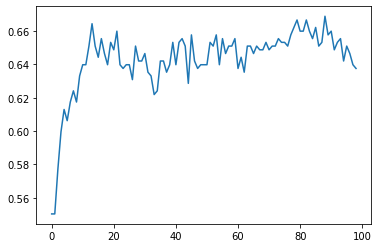

In [16]:
avg = []
maxi = 0
mymax = 0
for i in range (1, 100):
    abc = AdaBoostClassifier(n_estimators=i, random_state=0)  # DecisionTreeClassifier 
    abc.fit(X_train, y_train)

    y_pred = abc.predict(X_test)
    predict_score = metrics.accuracy_score(y_test, y_pred)
    if(predict_score > mymax):
         mymax = predict_score
         maxi = i

    avg.append(predict_score)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.plot(range(len(avg)), avg)
print(maxi)
print(mymax)

In conclusion, in this notebook, I tried to split the target data into 3 parts and classify it that way. It seems that without SMOTE, this method gives out better results than the previous one. This is understandable because there are less target values to choose from. Note that when i tried to run SMOTE on this data, the accuracy increased but not as much and didn't surpass the previous method's accuracy.
An interesting note is that the previous method gave out very bad adaboost results and this one resulted in much better results.   